# Stats and Politics 2: Data Analysis

Build on the previous deliverable to conduct some analysis of the presidential election data.

1. Which data columns are correlated with the Republican vote share? Which columns are not? Does this pattern appear in both elections? Are these correlations statistically significant?

2. Conduct a statistical test to see whether the mean Republican party vote share across all of the counties are different between the 2 elections. Which statistical test is appropriate here? Describe why you’ve chosen your test and interpret your results. Assume that the people who voted in each county are a representative sample of its population.

3. Fit a statistical model that predicts the 2016 relative vote share of the Republican party within a county using the county-level demographic data. Explain why you chose that particular model. When building your model, answer the following questions:
    * What are the data points? What are the independent and dependent variables?
    * How good is the fit of your model? What metric is a good measure to evaluate your model? Interpret your results.

In [1]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

In [2]:
# importing csv files
data_df = pd.read_csv('data/data_clean.csv')
votes_df = pd.read_csv('data/votes_clean.csv')

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 47 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   State                                                       3141 non-null   object 
 1   ST                                                          3141 non-null   object 
 2   Fips                                                        3141 non-null   int64  
 3   County                                                      3141 non-null   object 
 4   Precincts                                                   3141 non-null   float64
 5   Votes                                                       3141 non-null   float64
 6   Less Than High School Diploma                               3141 non-null   float64
 7   At Least High School Diploma                                3141 non-null   float64
 8 

In [4]:
votes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Democrats 08 (Votes)     3141 non-null   float64
 1   Democrats 12 (Votes)     3141 non-null   float64
 2   Republicans 08 (Votes)   3141 non-null   float64
 3   Republicans 12 (Votes)   3141 non-null   float64
 4   votes16_trumpd           3141 non-null   float64
 5   votes16_clintonh         3141 non-null   float64
 6   Fips                     3141 non-null   int64  
 7   Democrats08_Voteshare    3141 non-null   float64
 8   Republicans08_Voteshare  3141 non-null   float64
 9   Democrats12_Voteshare    3141 non-null   float64
 10  Republicans12_Voteshare  3141 non-null   float64
 11  Democrats16_Voteshare    3141 non-null   float64
 12  Republicans16_Voteshare  3141 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 319.1 KB


In [5]:
data_df.columns = data_df.columns.str.lower().str.replace(' ', '_').str.replace('.', '_')
votes_df.columns = votes_df.columns.str.lower().str.replace(' ', '_')

In [6]:
votes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   democrats_08_(votes)     3141 non-null   float64
 1   democrats_12_(votes)     3141 non-null   float64
 2   republicans_08_(votes)   3141 non-null   float64
 3   republicans_12_(votes)   3141 non-null   float64
 4   votes16_trumpd           3141 non-null   float64
 5   votes16_clintonh         3141 non-null   float64
 6   fips                     3141 non-null   int64  
 7   democrats08_voteshare    3141 non-null   float64
 8   republicans08_voteshare  3141 non-null   float64
 9   democrats12_voteshare    3141 non-null   float64
 10  republicans12_voteshare  3141 non-null   float64
 11  democrats16_voteshare    3141 non-null   float64
 12  republicans16_voteshare  3141 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 319.1 KB


In [7]:
# creating temp dataframe of republican voteshare for all elections
df_rep = pd.DataFrame(votes_df[['fips','republicans08_voteshare','republicans12_voteshare','republicans16_voteshare']])
df_rep.head()

,fips,republicans08_voteshare,republicans12_voteshare,republicans16_voteshare
0,5043,0.597708,0.596440,0.626599
1,5087,0.649444,0.670072,0.755996
2,13159,0.669287,0.691523,0.738172
3,8037,0.382791,0.423862,0.391877
4,13091,0.681126,0.681034,0.732244


In [8]:
# merging with data_df to explore correlation with other columns
rdata_df = pd.merge(data_df , df_rep, on = 'fips')
rdata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3141 entries, 0 to 3140
Data columns (total 50 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   state                                                       3141 non-null   object 
 1   st                                                          3141 non-null   object 
 2   fips                                                        3141 non-null   int64  
 3   county                                                      3141 non-null   object 
 4   precincts                                                   3141 non-null   float64
 5   votes                                                       3141 non-null   float64
 6   less_than_high_school_diploma                               3141 non-null   float64
 7   at_least_high_school_diploma                                3141 non-null   float64
 8 

In [9]:
# getting correlations and storing
corr_df = pd.DataFrame(columns = ['columns', 'republicans08_voteshare', 'republicans12_voteshare', 'republicans16_voteshare'])

In [10]:
# list of columns to get correlations
cols = ["at_least_high_school_diploma", "at_least_bachelors's_degree", "graduate_degree","school_enrollment","median_earnings_2010","white_(not_latino)_population","african_american_population",
        "native_american_population","asian_american_population","other_race_or_races","latino_population","children_under_6_living_in_poverty","adults_65_and_older_living_in_poverty","total_population",
        "preschool_enrollment_ratio_enrolled_ages_3_and_4","poverty_rate_below_federal_poverty_threshold","gini_coefficient","child_poverty_living_in_families_below_the_poverty_line",
        "management_professional_and_related_occupations","service_occupations","sales_and_office_occupations","farming_fishing_and_forestry_occupations","construction_extraction_maintenance_and_repair_occupations",
        "production_transportation_and_material_moving_occupations","sire_homogeneity","median_age","low_birthweight","teen_births","children_in_single_parent_households","adult_smoking","adult_obesity","diabetes",
        "sexually_transmitted_infections","hiv_prevalence_rate","uninsured","unemployment","violent_crime","homicide_rate","injury_deaths","infant_mortality"]

corr_df['columns'] = cols

In [11]:
for count, col in enumerate(cols):
    corr_df[corr_df.columns[1]].loc[count] = rdata_df['republicans08_voteshare'].corr(rdata_df[col])
    corr_df[corr_df.columns[2]].loc[count] = rdata_df['republicans12_voteshare'].corr(rdata_df[col])
    corr_df[corr_df.columns[3]].loc[count] = rdata_df['republicans16_voteshare'].corr(rdata_df[col])

In [12]:
corr_df

,columns,republicans08_voteshare,republicans12_voteshare,republicans16_voteshare
0,at_least_high_school_diploma,-0.0869088,-0.0501589,-0.0571507
1,at_least_bachelors's_degree,-0.304765,-0.303588,-0.463351
2,graduate_degree,-0.366891,-0.36904,-0.515317
3,school_enrollment,-0.126577,-0.122559,-0.153327
4,median_earnings_2010,-0.112483,-0.120963,-0.198063
5,white_(not_latino)_population,0.362435,0.449336,0.56875
6,african_american_population,-0.306573,-0.386982,-0.452888
7,native_american_population,-0.135361,-0.137604,-0.115751
8,asian_american_population,-0.304169,-0.318204,-0.411752
9,other_race_or_races,-0.114205,-0.127281,-0.154596


In [55]:
corr_df[(corr_df['republicans08_voteshare'] <= -0.3) | (corr_df['republicans08_voteshare'] >= 0.3)][['columns','republicans08_voteshare']]

,columns,republicans08_voteshare
1,at_least_bachelors's_degree,-0.304765
2,graduate_degree,-0.366891
5,white_(not_latino)_population,0.362435
6,african_american_population,-0.306573
8,asian_american_population,-0.304169
22,construction_extraction_maintenance_and_repair...,0.342119
28,children_in_single_parent_households,-0.36758
32,sexually_transmitted_infections,-0.347845
35,unemployment,-0.310797


In [54]:
corr_df[(corr_df['republicans12_voteshare'] <= -0.3) | (corr_df['republicans12_voteshare'] >= 0.3)][['columns','republicans12_voteshare']]

,columns,republicans12_voteshare
1,at_least_bachelors's_degree,-0.303588
2,graduate_degree,-0.36904
5,white_(not_latino)_population,0.449336
6,african_american_population,-0.386982
8,asian_american_population,-0.318204
22,construction_extraction_maintenance_and_repair...,0.345431
28,children_in_single_parent_households,-0.428315
32,sexually_transmitted_infections,-0.410198
33,hiv_prevalence_rate,-0.316011
35,unemployment,-0.331446


In [53]:
corr_df[(corr_df['republicans16_voteshare'] <= -0.3) | (corr_df['republicans16_voteshare'] >= 0.3)][['columns','republicans16_voteshare']]

,columns,republicans16_voteshare
1,at_least_bachelors's_degree,-0.463351
2,graduate_degree,-0.515317
5,white_(not_latino)_population,0.56875
6,african_american_population,-0.452888
8,asian_american_population,-0.411752
13,total_population,-0.346634
14,preschool_enrollment_ratio_enrolled_ages_3_and_4,-0.310874
22,construction_extraction_maintenance_and_repair...,0.363151
24,sire_homogeneity,0.448294
25,median_age,0.322075


In [33]:
# creating dataframe to hold p-values to test if the correlations are statistically significant
pvals_df = pd.DataFrame(columns = ['columns', 'p08', 'p12', 'p16'])
pvals_df['columns'] = cols

In [43]:
# looping through columns using two-sample independent t-test to find p-values
for count, col in enumerate(cols):
    pvals_df[pvals_df.columns[0]].iloc[count] = col
    pvals_df[pvals_df.columns[1]].iloc[count] = stats.ttest_ind(rdata_df['republicans08_voteshare'], rdata_df[col])[1]
    pvals_df[pvals_df.columns[2]].iloc[count] = stats.ttest_ind(rdata_df['republicans12_voteshare'], rdata_df[col])[1]
    pvals_df[pvals_df.columns[3]].iloc[count] = stats.ttest_ind(rdata_df['republicans16_voteshare'], rdata_df[col])[1]
    

In [44]:
pvals_df

,columns,p08,p12,p16
0,at_least_high_school_diploma,0,0,0
1,at_least_bachelors's_degree,0,0,0
2,graduate_degree,0,0,0
3,school_enrollment,0,0,0
4,median_earnings_2010,0,0,0
5,white_(not_latino)_population,0,0,0
6,african_american_population,1.53129e-206,3.852e-205,2.05249e-202
7,native_american_population,8.14847e-21,6.71686e-20,3.59909e-18
8,asian_american_population,1.04949e-33,3.45222e-30,6.8899e-24
9,other_race_or_races,6.75801e-199,1.84646e-188,7.94235e-169


In [45]:
corr_p_df = pd.merge(corr_df,pvals_df,on='columns')

In [46]:
corr_p_df

,columns,republicans08_voteshare,republicans12_voteshare,republicans16_voteshare,p08,p12,p16
0,at_least_high_school_diploma,-0.0869088,-0.0501589,-0.0571507,0,0,0
1,at_least_bachelors's_degree,-0.304765,-0.303588,-0.463351,0,0,0
2,graduate_degree,-0.366891,-0.36904,-0.515317,0,0,0
3,school_enrollment,-0.126577,-0.122559,-0.153327,0,0,0
4,median_earnings_2010,-0.112483,-0.120963,-0.198063,0,0,0
5,white_(not_latino)_population,0.362435,0.449336,0.56875,0,0,0
6,african_american_population,-0.306573,-0.386982,-0.452888,1.53129e-206,3.852e-205,2.05249e-202
7,native_american_population,-0.135361,-0.137604,-0.115751,8.14847e-21,6.71686e-20,3.59909e-18
8,asian_american_population,-0.304169,-0.318204,-0.411752,1.04949e-33,3.45222e-30,6.8899e-24
9,other_race_or_races,-0.114205,-0.127281,-0.154596,6.75801e-199,1.84646e-188,7.94235e-169


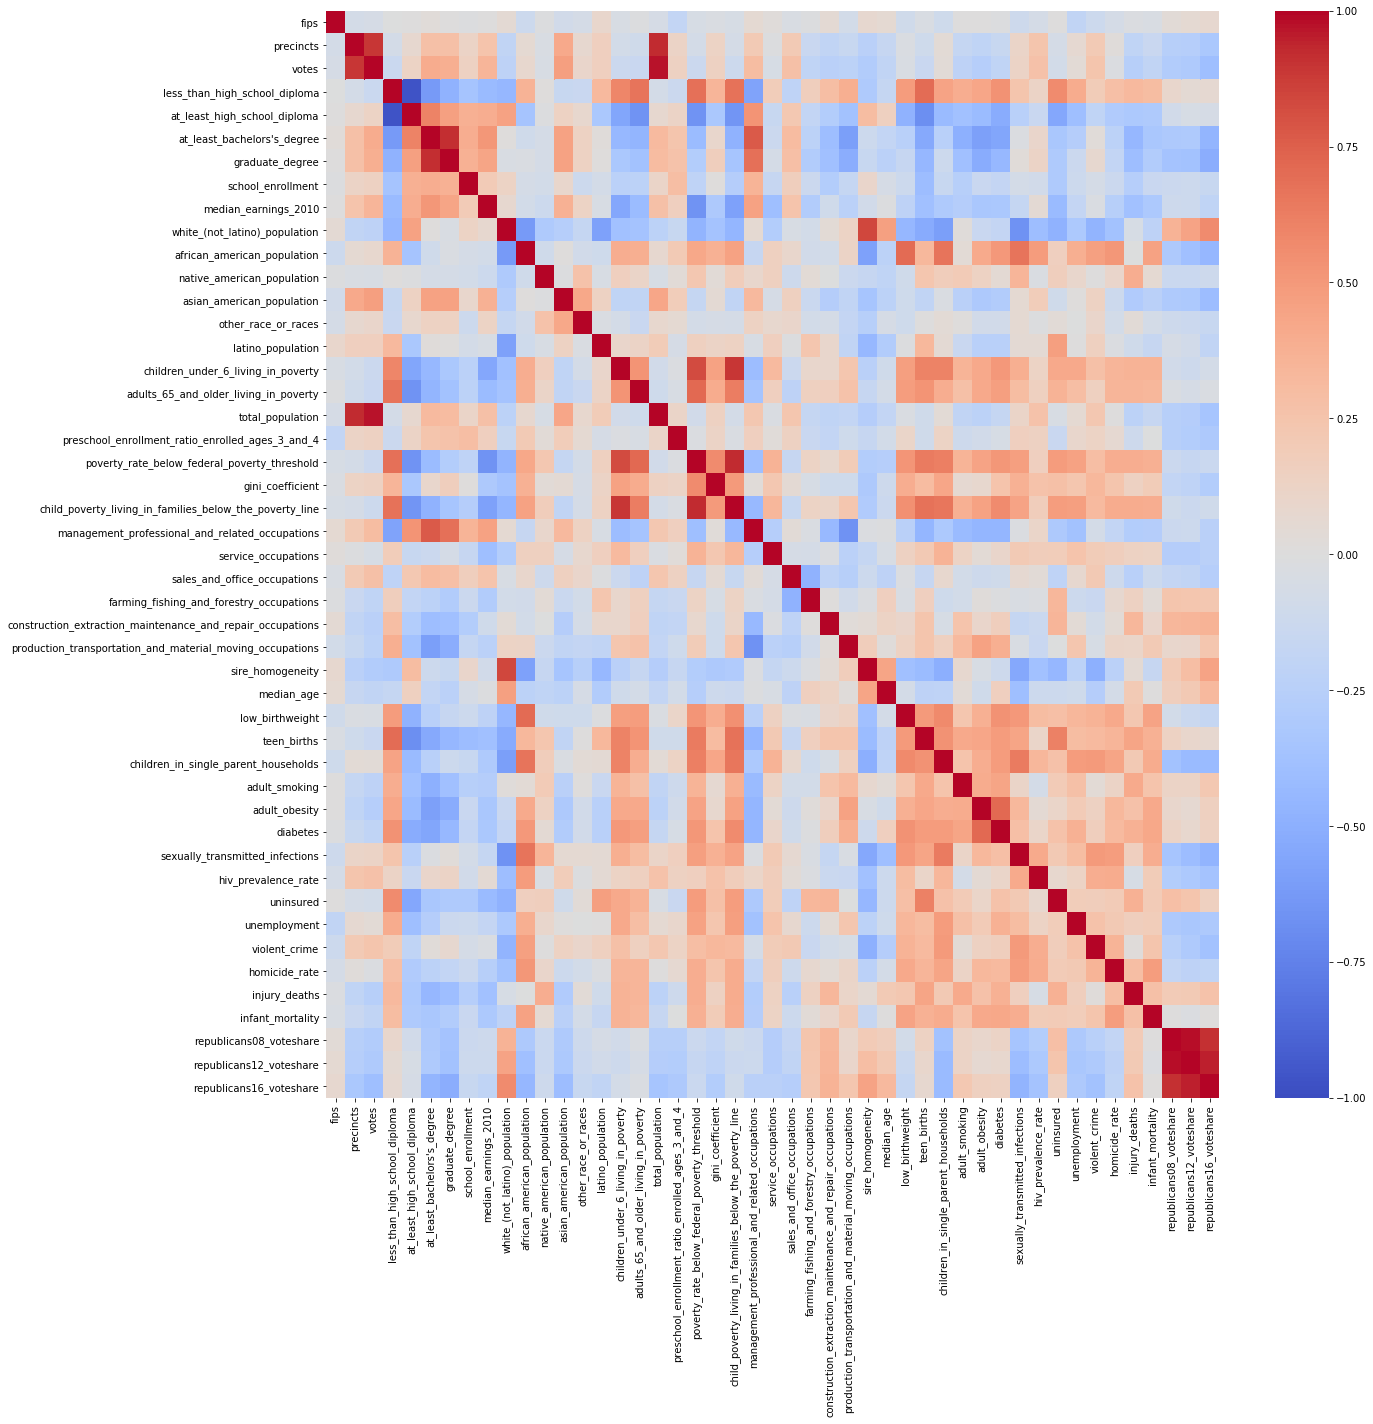

In [58]:
plt.figure(figsize=(20,20))
sns.heatmap(rdata_df.corr(), center = 0, vmin = -1, cmap = 'coolwarm')